/tmp/ipykernel_7811/3304071065.py:27: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.boxplot(
/tmp/ipykernel_7811/3304071065.py:32: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.stripplot(


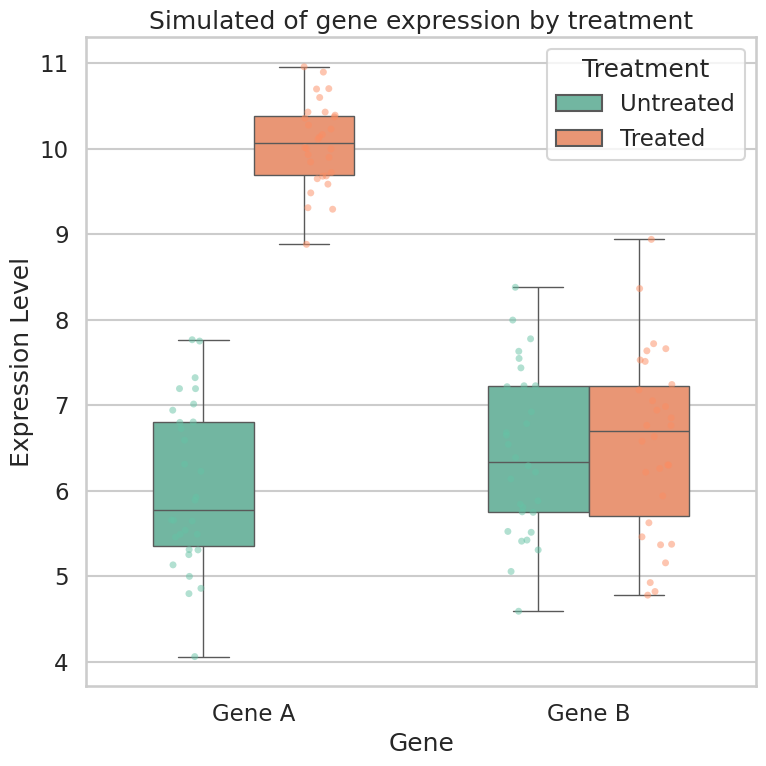

In [1]:
# --- Single aesthetic seaborn plot for two genes ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Prepare data (use your own df with columns: Gene, Group, Expression if you have it)
np.random.seed(123)
n_per_group = 30
geneA_untreated = np.random.normal(loc=6.0, scale=0.8, size=n_per_group)
geneA_treated   = np.random.normal(loc=10.0, scale=0.4, size=n_per_group)
geneB_untreated = np.random.normal(loc=6.5, scale=0.9, size=n_per_group)
geneB_treated   = np.random.normal(loc=6.6, scale=0.9, size=n_per_group)

df = pd.DataFrame({
    "Gene": (["Gene A"] * (2 * n_per_group)) + (["Gene B"] * (2 * n_per_group)),
    "Group": (["Untreated"] * n_per_group + ["Treated"] * n_per_group) * 2,
    "Expression": np.concatenate([geneA_untreated, geneA_treated, geneB_untreated, geneB_treated])
})

# 2) Seaborn aesthetics
sns.set_theme(context="talk", style="whitegrid")  # clean, publication-friendly
palette = sns.color_palette("Set2")               # soft, colorblind-friendly

# 3) Single plot: x = Group, y = Expression, hue = Gene
plt.figure(figsize=(8, 8))
ax = sns.boxplot(
    data=df, x="Gene", y="Expression", hue="Group",
    palette=palette, width=0.6, fliersize=0
)
# Overlay individual points for transparency/variance
sns.stripplot(
    data=df, x="Gene", y="Expression", hue="Group",
    dodge=True, alpha=0.5, linewidth=0, palette=palette
)

# 4) Tidy legend (remove duplicates from stripplot)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Treatment", frameon=True)

# 5) Labels and layout
ax.set_title("Simulated of gene expression by treatment")
ax.set_xlabel("Gene")
ax.set_ylabel("Expression Level")
plt.tight_layout()

# 6) Save publication-quality PNG (and optional PDF)
plt.savefig("two_genes_boxplot.png", dpi=600, bbox_inches="tight")
plt.show()


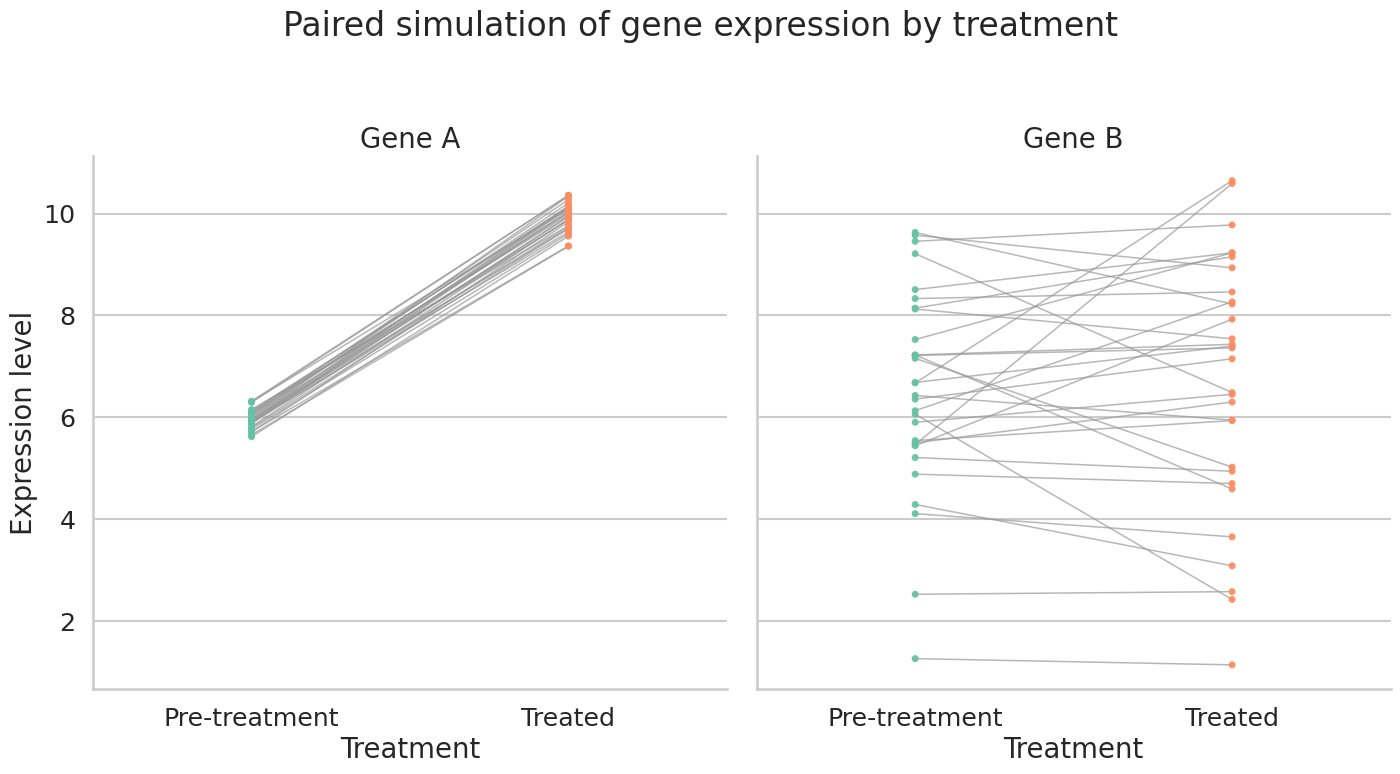

In [2]:
# --- Paired slope plot: gray lines + treatment-colored dots, with a proper legend ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

np.random.seed(42)
n_subjects = 30
subjects = np.arange(1, n_subjects + 1)
A_pre  = np.random.normal(loc=6.0, scale=0.2, size=n_subjects)
A_post = A_pre + np.random.normal(loc=4.0, scale=0.2, size=n_subjects)
B_pre  = np.random.normal(loc=6.5, scale=2, size=n_subjects)
B_post = B_pre + np.random.normal(loc=0.2, scale=2, size=n_subjects)
df = pd.DataFrame({
    "Subject": np.tile(subjects, 4),
    "Gene":    np.repeat(["Gene A", "Gene A", "Gene B", "Gene B"], n_subjects),
    "Group":   np.repeat(["Pre-treatment", "Treated", "Pre-treatment", "Treated"], n_subjects),
    "Expression": np.concatenate([A_pre, A_post, B_pre, B_post])
})

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

sns.set_theme(context="talk", style="whitegrid", font_scale=1.1)

order = ["Pre-treatment", "Treated"]

# Use the first two Set2 colors for dots
set2 = sns.color_palette("Set2", 2)
group_palette = {"Pre-treatment": set2[0], "Treated": set2[1]}  # matches your other plot

# Build facets WITHOUT hue so we can draw lines across both timepoints
g = sns.FacetGrid(df, col="Gene", sharey=True, height=8, aspect=0.9)

# Gray paired lines (same color for all subjects)
def draw_lines(data, **kwargs):
    for _, sub in data.groupby("Subject"):
        vals = sub.set_index("Group").loc[order, "Expression"]
        plt.plot(order, vals, color="0.6", lw=1.1, alpha=0.7, zorder=1)

g.map_dataframe(draw_lines)

# Dots colored by treatment using Set2[0] and Set2[1]
def draw_points(data, **kwargs):
    sns.stripplot(
        data=data, x="Group", y="Expression",
        order=order, hue="Group", palette=group_palette,
        jitter=0.0, alpha=0.95, size=5, dodge=False, zorder=2
    )

g.map_dataframe(draw_points)

# Single, clean legend using the same Set2 colors
handles = [
    Line2D([0], [0], marker='o', linestyle='', color=set2[0], label='Pre-treatment'),
    Line2D([0], [0], marker='o', linestyle='', color=set2[1], label='Treated'),
]

# Remove any per-axes legends created by stripplot
for ax in g.axes.flat:
    leg = ax.get_legend()
    if leg:
        leg.remove()

g.set_axis_labels("Treatment", "Expression level")
g.fig.suptitle("Paired simulation of gene expression by treatment")

# Define custom titles for each subplot
custom_titles = ["Gene A", "Gene B"]

# Iterate through the flattened axes and set titles
for ax, title in zip(g.axes.flatten(), custom_titles):
    ax.set_title(title)

    
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save if you want
plt.savefig("paired_two_genes_lines_and_dots_set2.png", dpi=600, bbox_inches="tight")
plt.show()


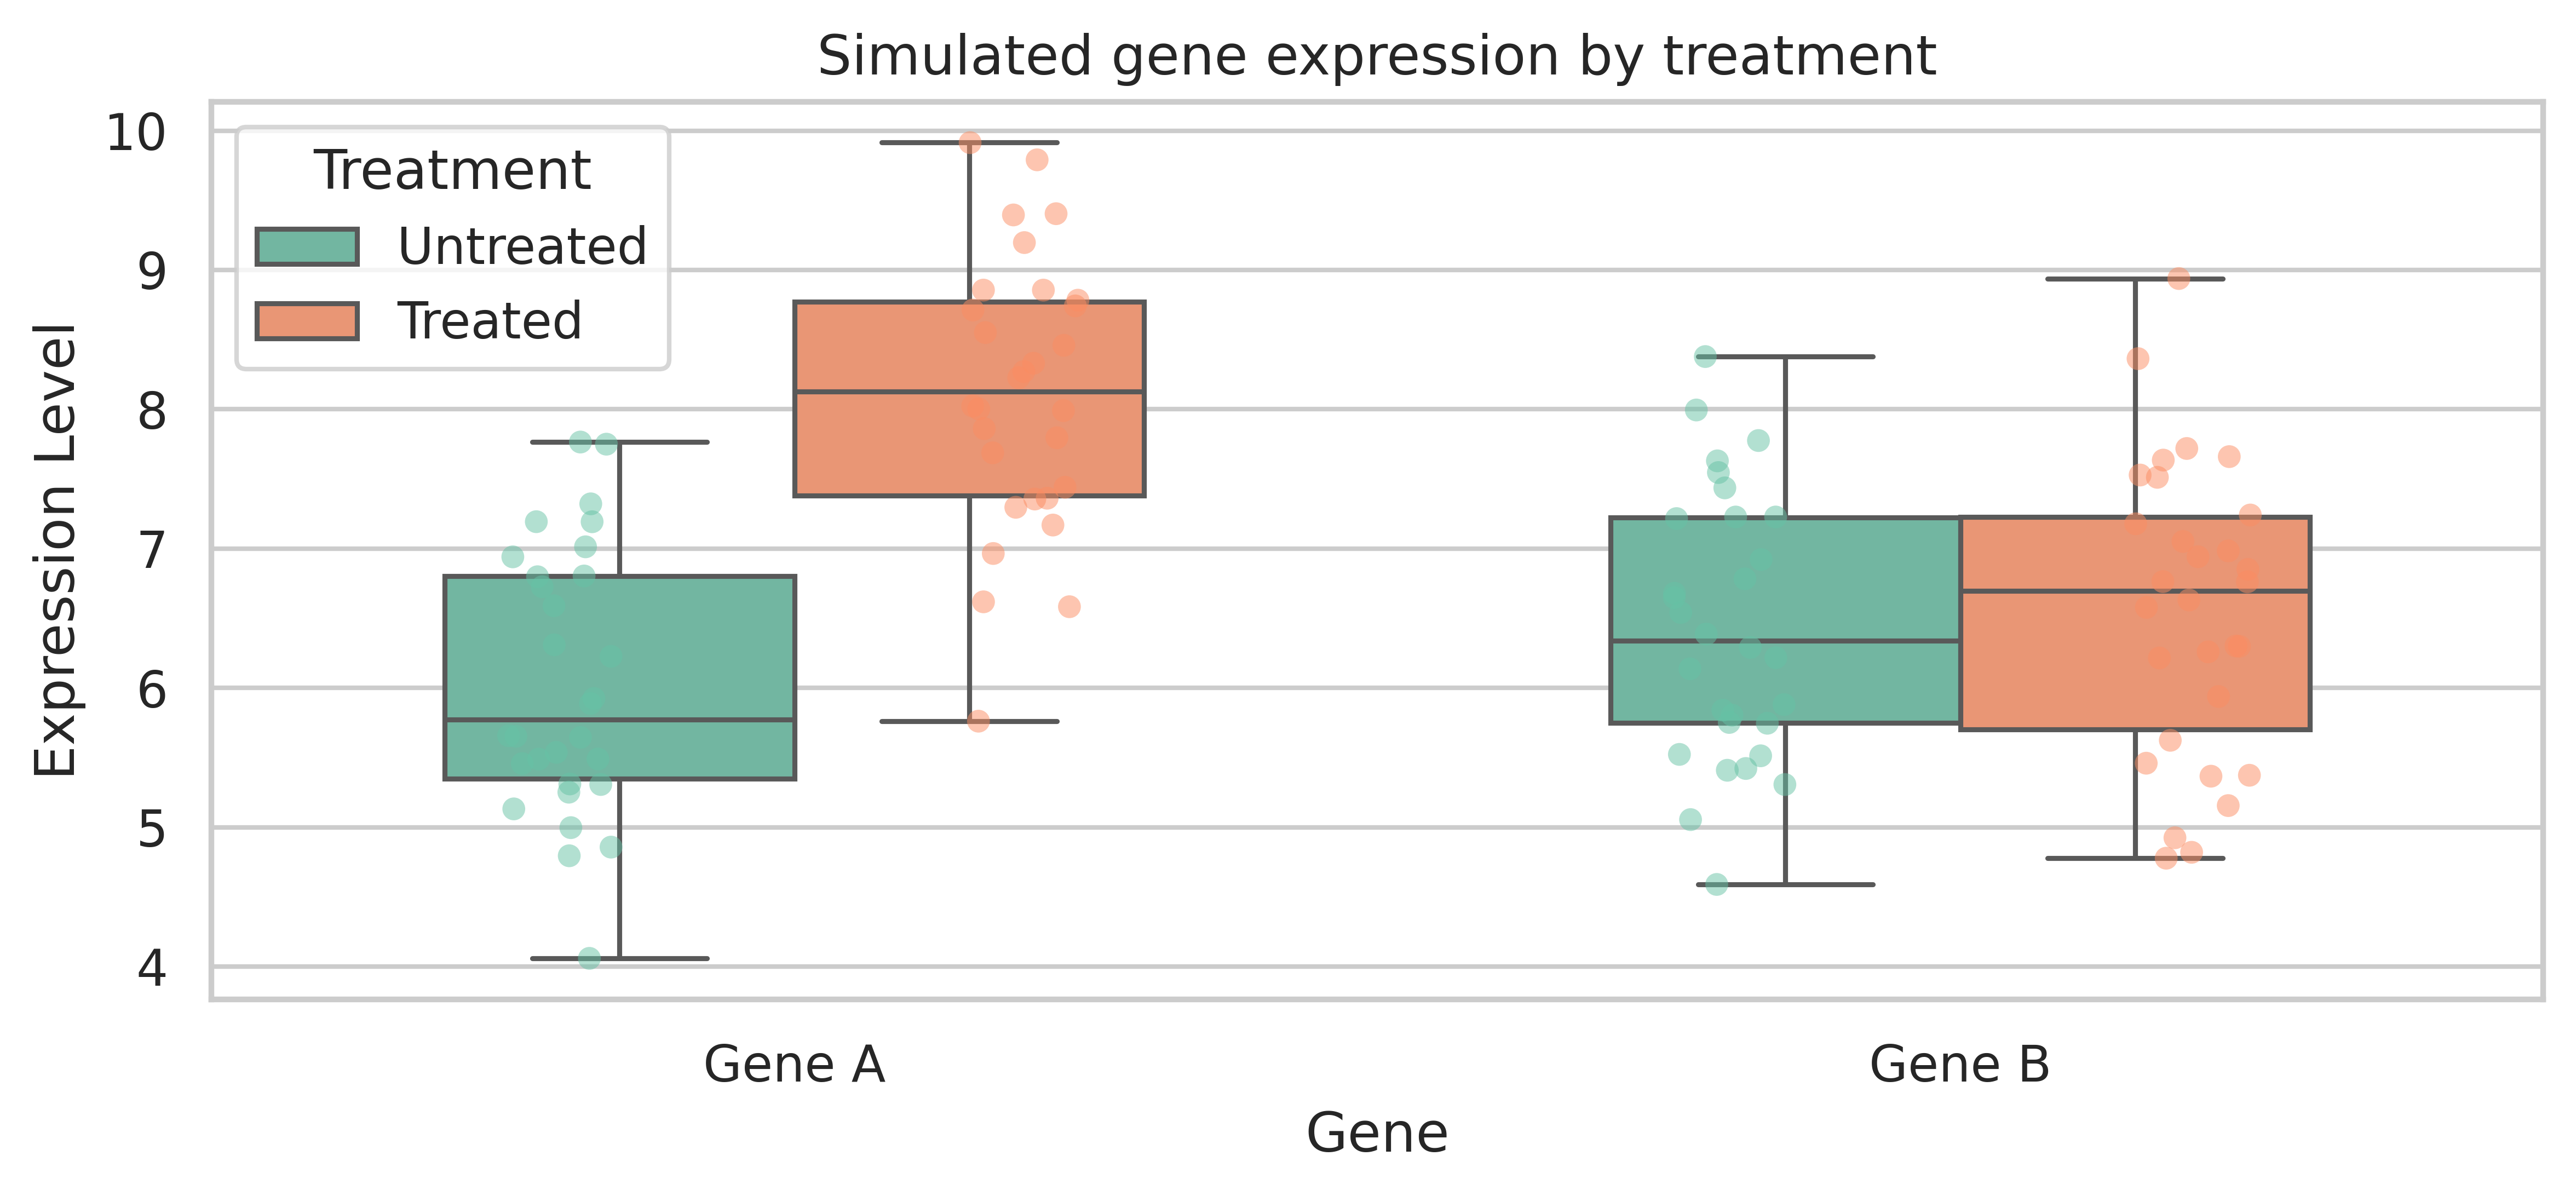

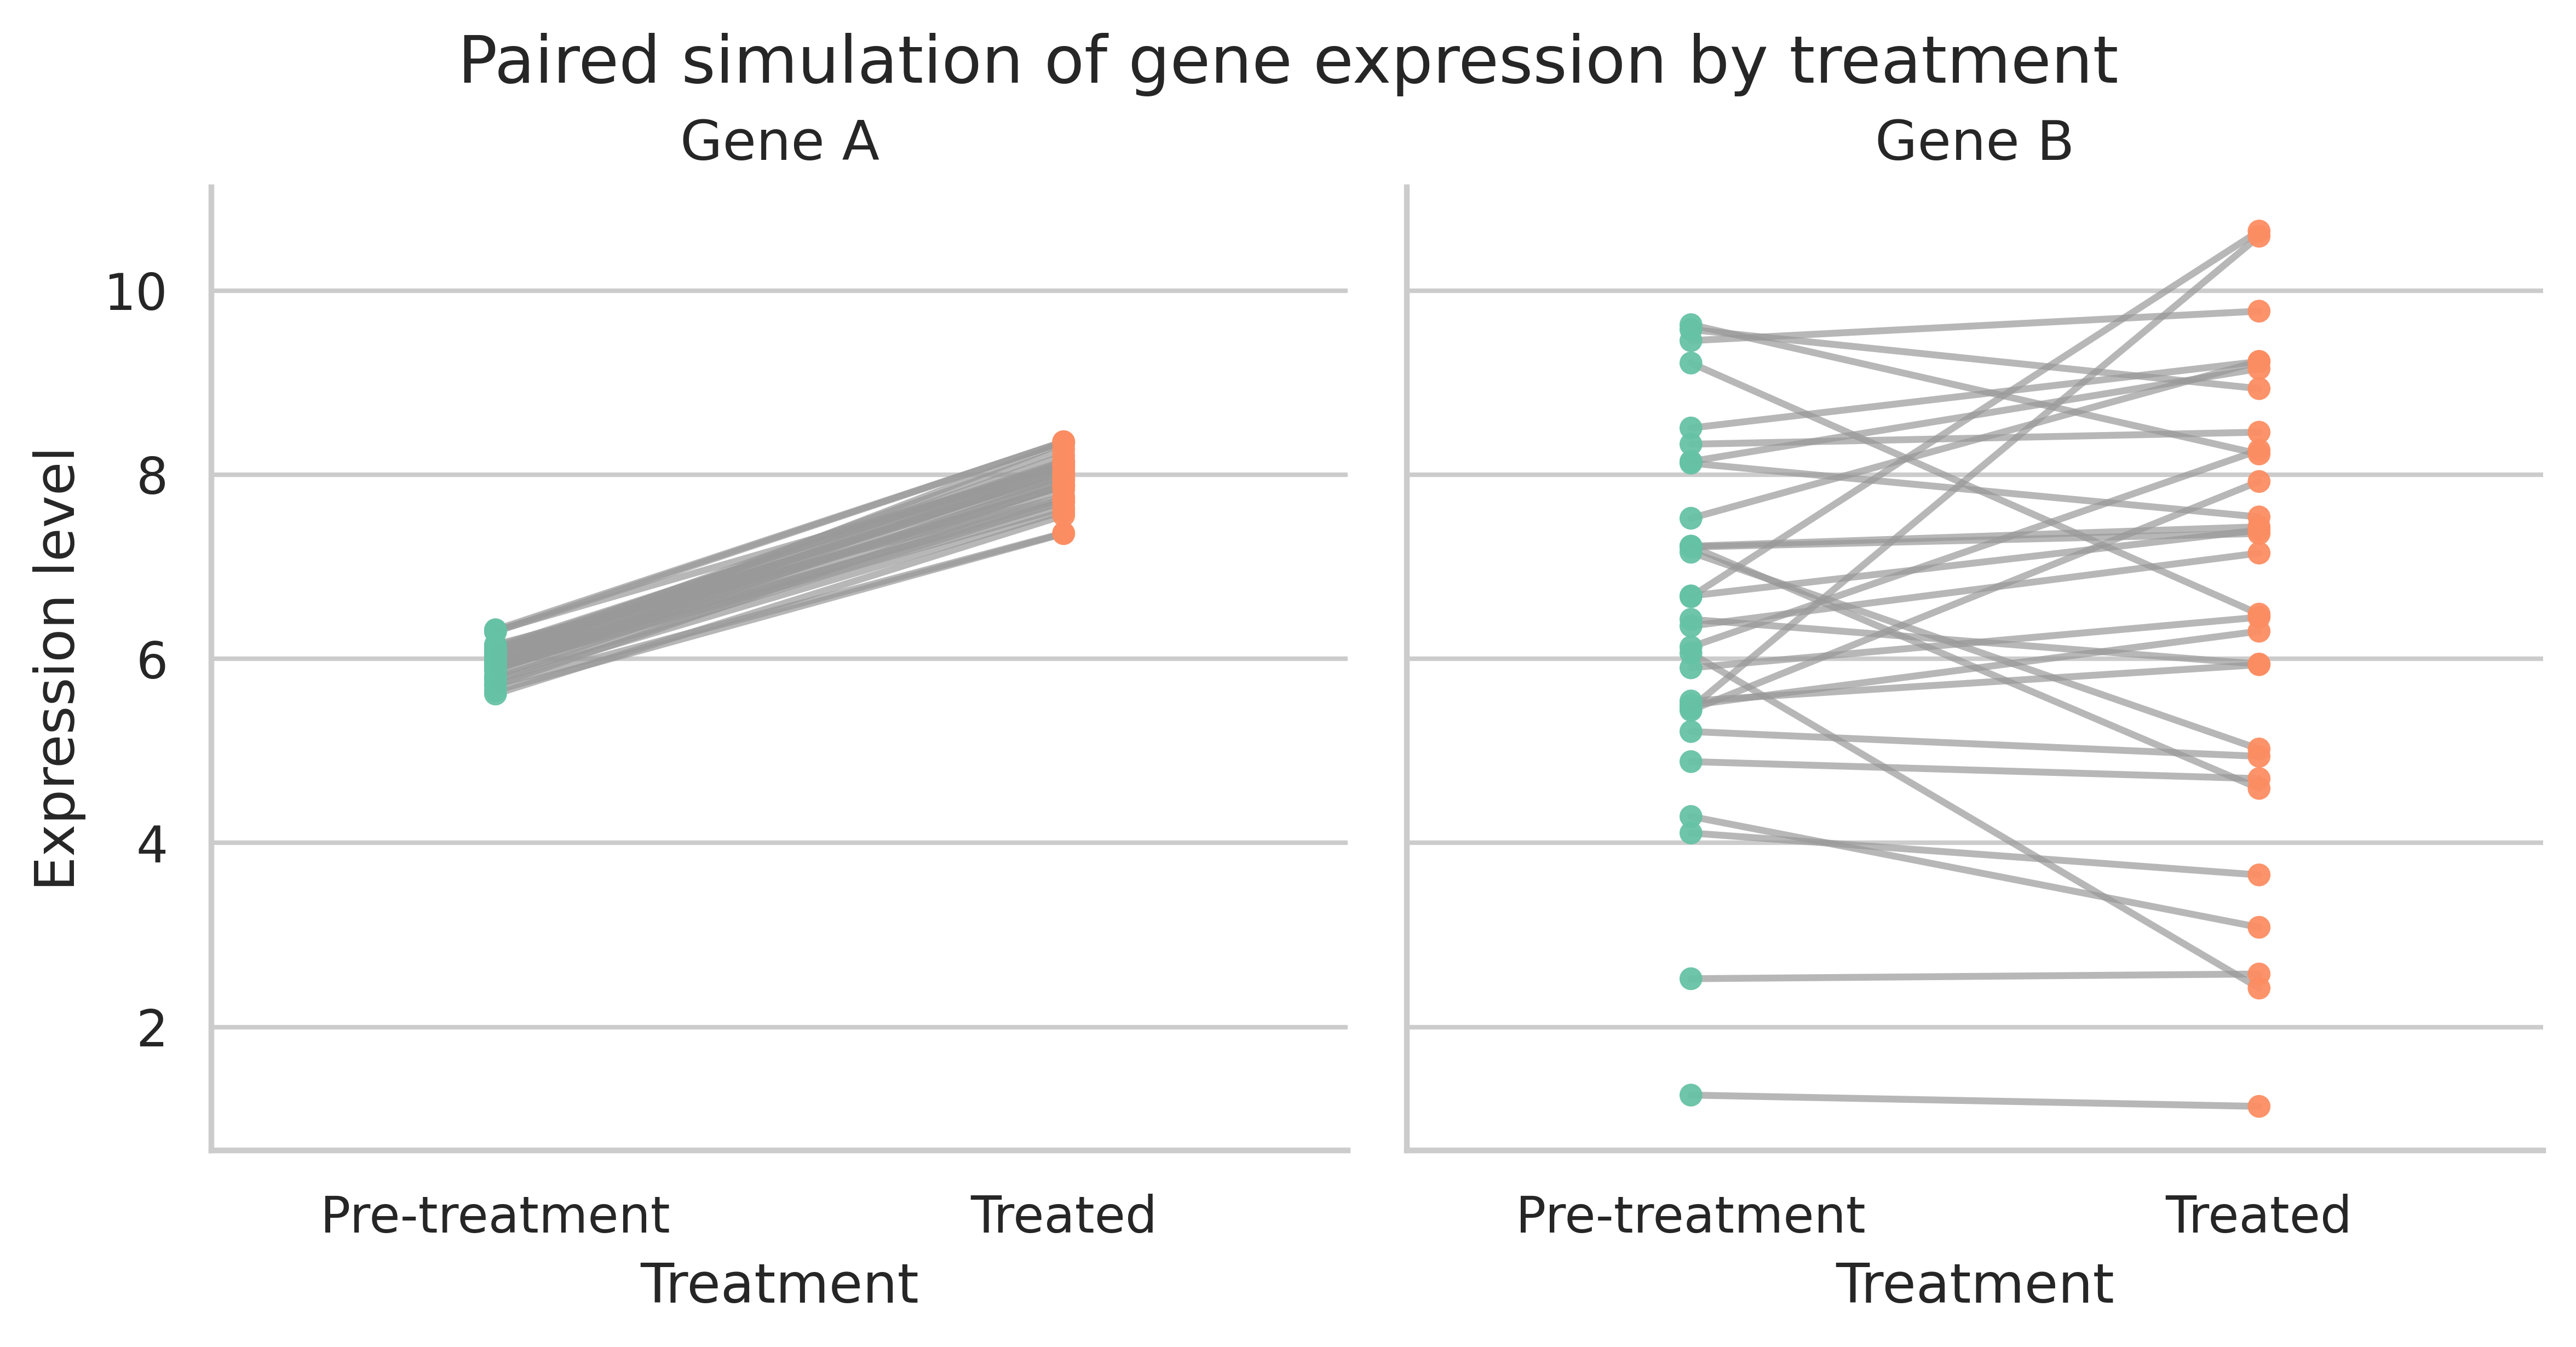

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ---- GLOBAL, RIGOROUS SIZING ----
FIG_W, FIG_H = 8, 4
DPI = 600

# Typeface & scaling (avoid seaborn context scaling variance)
RC = {
    "figure.dpi": DPI,
    "savefig.dpi": DPI,
    "font.size": 12,            # base text
    "axes.titlesize": 16,       # title
    "axes.labelsize": 14,       # axis labels
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.linewidth": 1.0,
    "xtick.major.width": 1.0,
    "ytick.major.width": 1.0,
    "lines.linewidth": 1.1,     # matches slope lines
}

mpl.rcParams.update(RC)
sns.set_theme(style="whitegrid")    # keep aesthetics, but sizing comes from RC

# Consistent marker size for both stripplots
STRIP_SIZE = 5

# Consistent margins (in figure fraction) used in both plots via tight_layout(rect=...)
TIGHT_RECT = [0, 0, 1, 0.95]   # leave the same headroom for suptitle/title


# Data (your original)
np.random.seed(123)
n_per_group = 30
geneA_untreated = np.random.normal(loc=6.0, scale=0.8, size=n_per_group)
geneA_treated   = np.random.normal(loc=8.0, scale=0.8, size=n_per_group)
geneB_untreated = np.random.normal(loc=6.5, scale=0.9, size=n_per_group)
geneB_treated   = np.random.normal(loc=6.6, scale=0.9, size=n_per_group)

df = pd.DataFrame({
    "Gene": (["Gene A"] * (2 * n_per_group)) + (["Gene B"] * (2 * n_per_group)),
    "Group": (["Untreated"] * n_per_group + ["Treated"] * n_per_group) * 2,
    "Expression": np.concatenate([geneA_untreated, geneA_treated, geneB_untreated, geneB_treated])
})

palette = sns.color_palette("Set2", 2)

fig, ax = plt.subplots(figsize=(FIG_W, FIG_H), dpi=DPI)

# Boxplot with controlled linewidths/fliersize
sns.boxplot(
    data=df, x="Gene", y="Expression", hue="Group",
    palette=palette, width=0.6, fliersize=0, linewidth=1.1, ax=ax
)

# Stripplot with matching size and palette
sns.stripplot(
    data=df, x="Gene", y="Expression", hue="Group",
    dodge=True, alpha=0.5, linewidth=0, size=STRIP_SIZE, palette=palette, ax=ax
)

# Clean legend (no duplicates from stripplot)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Treatment", frameon=True)

ax.set_title("Simulated gene expression by treatment")
ax.set_xlabel("Gene")
ax.set_ylabel("Expression Level")

plt.tight_layout(rect=TIGHT_RECT)
plt.savefig("two_genes_boxplot.png", bbox_inches="tight")
plt.show()


np.random.seed(42)
n_subjects = 30
subjects = np.arange(1, n_subjects + 1)
A_pre  = np.random.normal(loc=6.0, scale=0.2, size=n_subjects)
A_post = A_pre + np.random.normal(loc=2.0, scale=0.2, size=n_subjects)
B_pre  = np.random.normal(loc=6.5, scale=2, size=n_subjects)
B_post = B_pre + np.random.normal(loc=0.2, scale=2, size=n_subjects)

df2 = pd.DataFrame({
    "Subject": np.tile(subjects, 4),
    "Gene":    np.repeat(["Gene A", "Gene A", "Gene B", "Gene B"], n_subjects),
    "Group":   np.repeat(["Pre-treatment", "Treated", "Pre-treatment", "Treated"], n_subjects),
    "Expression": np.concatenate([A_pre, A_post, B_pre, B_post])
})

order = ["Pre-treatment", "Treated"]
set2 = sns.color_palette("Set2", 2)
group_palette = {"Pre-treatment": set2[0], "Treated": set2[1]}

# Build the grid; height/aspect are placeholders because we’ll hard-set the figure size
g = sns.FacetGrid(df2, col="Gene", sharey=True, height=4, aspect=1.0)

def draw_lines(data, **kwargs):
    for _, sub in data.groupby("Subject"):
        vals = sub.set_index("Group").loc[order, "Expression"]
        plt.plot(order, vals, color="0.6", lw=mpl.rcParams["lines.linewidth"], alpha=0.7, zorder=1)

def draw_points(data, **kwargs):
    sns.stripplot(
        data=data, x="Group", y="Expression",
        order=order, hue="Group", palette=group_palette,
        jitter=0.0, alpha=0.95, size=STRIP_SIZE, dodge=False, zorder=2
    )

g.map_dataframe(draw_lines)
g.map_dataframe(draw_points)

# Remove auto legends from axes
for ax in g.axes.flat:
    leg = ax.get_legend()
    if leg:
        leg.remove()

# Titles, labels
g.set_axis_labels("Treatment", "Expression level")
g.fig.suptitle(
    "Paired simulation of gene expression by treatment",
    y=1.02  # push up closer to top edge
)

# Uniform per-axes titles
custom_titles = ["Gene A", "Gene B"]
for ax, title in zip(g.axes.flatten(), custom_titles):
    ax.set_title(title, fontsize=mpl.rcParams["axes.titlesize"])

# ---- FORCE THE SAME CANVAS SIZE & LAYOUT AS THE FIRST FIGURE ----


# Save if you want
plt.savefig("paired_two_genes_lines_and_dots_set2.png", dpi=600, bbox_inches="tight")
plt.show()